In [1]:
# losujemy 2k obserwacji w zakresie x(-100, 100), y(-100,100)
# ustalamy k-jako liczba grup
# losujemy centroidy (punkty abstrakcyjny)
# przydzielamy do grupy
# wyznaczamy nowe lokalizacje centroidow
# do momementu az punkty zmieniaja grupy powtarzamy poprzednie punkty
# wuswietl reprezentacje przynaleznych punktow

In [2]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import math
import numpy as np

Losowanie 2000 obserwacji

In [3]:
df = pd.DataFrame()
df['x'] = [random.randrange(-100, 100) for x in range(2000)]
df['y'] = [random.randrange(-100, 100) for x in range(2000)]
df.head()

,x,y
0,83,95
1,67,48
2,-59,73
3,-65,79
4,12,-11


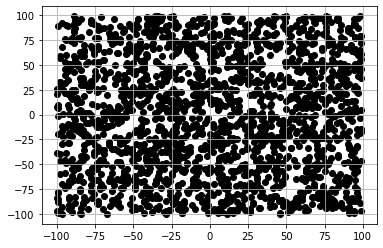

In [4]:
plt.scatter(df['x'], df['y'], color='black')
plt.grid()

Koniec


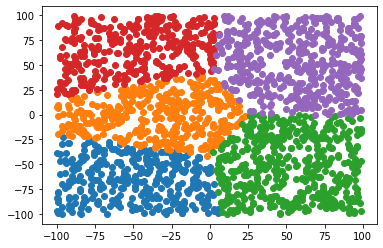

In [5]:
# K - mean algorithm 
# takes n-folds 
# and assigns a class to each point based on the Euclidean distance
# plots results

class Obserwacje:
    ekstencja = list()
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.clasa = []
        self.centroida = []
        self.distance_centroida = []
        Obserwacje.ekstencja.append(self)
    
    @classmethod
    def import_data(cls, x, y):
        for i in range(len(x)):
            Obserwacje(x[i],y[i])
            
            
    def __str__(self):
        return f'x: {self.x}, y: {self.y}, clasa: {self.clasa}, centroida: {self.centroida}, distance: {self.distance_centroida}'
            
            

Obserwacje.import_data(df['x'], df['y'])




class Kmean:
    def __init__(self, folds):
        self.folds = folds
        self.centroidy = self.create_centroids()
        self.mean = 0
        self.clasa = self.create_klasy()
        self.obs_wklasach = None
        
    def create_centroids(self):
        return [[random.randrange(-100, 100),  random.randrange(-100, 100)] for x in range(self.folds)]
    
    def create_klasy(self):
        return [x for x in range(self.folds)]
    
    def count_distance(self, obs):
        centroidy = list()
        distance_centroida = list()
        for i in range(len(self.centroidy)):
            centroida = self.centroidy[i]
            distance = math.sqrt(((centroida[0] - obs.x)**2) + ((centroida[1] - obs.y)**2))
            centroidy.append([centroida[0], centroida[1]])
            distance_centroida.append(distance)

        obs.centroida = list(centroidy)
        obs.distance_centroida = list(distance_centroida)
        obs.clasa = np.argmin(distance_centroida)
        
    def find_new_centroids(self, data):
        obs_wklasach = {x:{'x': 0, 'y':0, 'n':0} for x in self.clasa} # {0: {'x': 0, 'y': 0}, 1: {'x': 0, 'y': 0}, 2: {'x': 0, 'y': 0}}
        for obs in data:
            obs_wklasach[obs.clasa]['x'] += obs.x
            obs_wklasach[obs.clasa]['y'] += obs.y
            obs_wklasach[obs.clasa]['n'] += 1
        self.obs_wklasach = obs_wklasach
        
        dalej = False
        
        for i in range(len(self.centroidy)):
            new_centroid = [obs_wklasach[i]['x']/obs_wklasach[i]['n'], obs_wklasach[i]['y']/obs_wklasach[i]['n']]
            if new_centroid != self.centroidy[i]:
                    dalej = True
            self.centroidy[i][0] = obs_wklasach[i]['x']/obs_wklasach[i]['n']
            self.centroidy[i][1] = obs_wklasach[i]['y']/obs_wklasach[i]['n']

        return dalej
    
    def draw_results(self, data):
        obs_wklasach = {x:{'x': [], 'y':[]} for x in self.clasa} 
        for obs in data:
            obs_wklasach[obs.clasa]['x'].append(obs.x)
            obs_wklasach[obs.clasa]['y'].append(obs.y)
            
        for c in obs_wklasach:
            plt.scatter(obs_wklasach[c]['x'], obs_wklasach[c]['y'])
        plt.show()
            
        
            
            

kmean = Kmean(5)

while True:
    for obs in Obserwacje.ekstencja:
        kmean.count_distance(obs)
    dalej = kmean.find_new_centroids(Obserwacje.ekstencja)
    if dalej == False:
        print('Koniec')
        kmean.draw_results(Obserwacje.ekstencja)
        break



